In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd
df_social=pd.read_csv("Social_Network_Ads.csv")
df_social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
#Lets chcek the presence of null values in the dataset
df_social.isnull().sum()
#There  are no null values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
#Lets check the datatypes of the columns
df_social.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [7]:
#we know that User ID wont affect the purchasing pattern so we can drop
df_social.drop(columns=["User ID"],inplace=True)

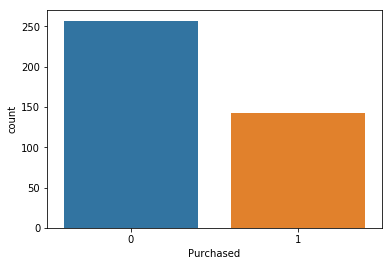

In [8]:
#lets chcek the count of each type of target class
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="Purchased",data=df_social)
plt.show()
# it is the imbalanced set with difference around 100

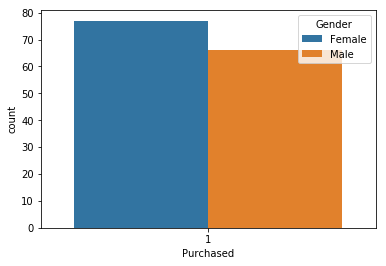

In [9]:
#lets chcek count of purchase with respect to gender
sns.countplot(x="Purchased",hue="Gender",data=df_social.loc[df_social["Purchased"]==1])
plt.show()
#Count of females sho purchased is more than men wh did

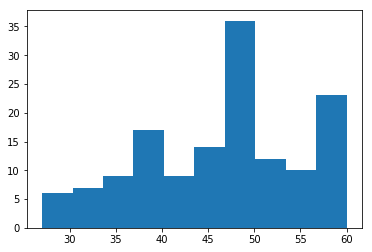

In [10]:
#lets check in which age group shopping was more
plt.hist(x="Age",data=df_social.loc[df_social["Purchased"]==1])
plt.show()
#So maximum purchase was done by age group 45 to 50

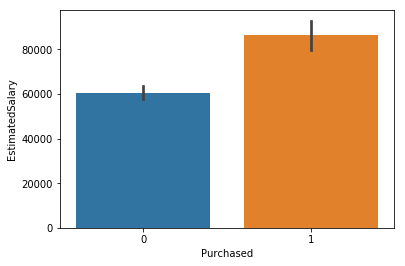

In [11]:
#What is the average salary of people who purchased and who didn't
sns.barplot(x="Purchased",y="EstimatedSalary",data=df_social)
plt.show()
#People who did purchasing have average salary more than who didn't

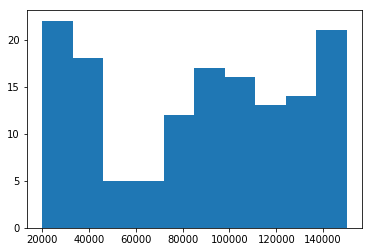

In [12]:
#lets chcek in which salary group purchasng was highest
plt.hist(x="EstimatedSalary",data=df_social.loc[df_social["Purchased"]==1])
plt.show()
#people with salary least and highest did maximum purchase

In [13]:
#lets chcek the skewness of the dataset
df_social.skew()
#from below output skewness seems fine

Age                0.231337
EstimatedSalary    0.495024
Purchased          0.596903
dtype: float64

In [14]:
#Lets seprate the input and output from dataset
df_x=df_social.drop(columns=["Purchased"])
y=df_social[["Purchased"]]

In [15]:
#lets use pd.get_dummies to convert input dataset columns into integers
df_x=pd.get_dummies(df_x,drop_first=True)

In [16]:
#let's bring the features to same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [29]:
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.10,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [30]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    print("Mean roc auc score for classifier: ",cross_val_score(model,x,y,cv=10,scoring="roc_auc").mean())
    print("standard deviation in roc auc score for classifier: ",cross_val_score(model,x,y,cv=10,scoring="roc_auc").std())
    print(cross_val_score(model,x,y,cv=10,scoring="roc_auc"))

In [31]:
#Lets chcek logistic regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
max_aucroc_score(lg_clf,x,y)

auc roc score corresponding to  42  is  0.8901098901098902
auc roc score corresponding to  43  is  0.8708791208791209
auc roc score corresponding to  44  is  0.8159340659340659
auc roc score corresponding to  45  is  0.9642857142857143
auc roc score corresponding to  46  is  0.9258241758241759
auc roc score corresponding to  47  is  0.9065934065934066
auc roc score corresponding to  48  is  0.8131868131868132
auc roc score corresponding to  49  is  0.9038461538461539
auc roc score corresponding to  50  is  0.7967032967032968
auc roc score corresponding to  51  is  0.8324175824175825
auc roc score corresponding to  52  is  0.8543956043956044
auc roc score corresponding to  53  is  0.7445054945054945
auc roc score corresponding to  54  is  0.835164835164835
auc roc score corresponding to  55  is  0.9615384615384616
auc roc score corresponding to  56  is  0.8873626373626373
auc roc score corresponding to  57  is  0.8131868131868132
auc roc score corresponding to  58  is  0.815934065934065

45

In [32]:
#lets print the scores for logistic regression
print("LOGISTIC CLASSIFIER\n\n")
model_evaluation(lg_clf,x,y)

LOGISTIC CLASSIFIER


Mean roc auc score for classifier:  0.9396080586080586
standard deviation in roc auc score for classifier:  0.05465643622432407
[1.         0.91666667 0.9974359  0.97802198 0.99175824 0.98351648
 0.92582418 0.88571429 0.85714286 0.86      ]


In [34]:
#Lets chcek SVM Classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=10,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'C': 0.1, 'kernel': 'poly'}

In [35]:
svc=SVC(C=0.1,kernel="poly")
max_aucroc_score(svc,x,y)

auc roc score corresponding to  42  is  0.8571428571428572
auc roc score corresponding to  43  is  0.9258241758241759
auc roc score corresponding to  44  is  0.9450549450549451
auc roc score corresponding to  45  is  0.9642857142857143
auc roc score corresponding to  46  is  0.9093406593406594
auc roc score corresponding to  47  is  0.8708791208791209
auc roc score corresponding to  48  is  0.9258241758241759
auc roc score corresponding to  49  is  0.8516483516483516
auc roc score corresponding to  50  is  0.8543956043956044
auc roc score corresponding to  51  is  0.8708791208791209
auc roc score corresponding to  52  is  0.8928571428571428
auc roc score corresponding to  53  is  0.7637362637362637
auc roc score corresponding to  54  is  0.8736263736263735
auc roc score corresponding to  55  is  0.9285714285714286
auc roc score corresponding to  56  is  0.8901098901098902
auc roc score corresponding to  57  is  0.8708791208791209
auc roc score corresponding to  58  is  0.81868131868131

45

In [36]:
#lets print the scores for logistic regression
print("SVM CLASSIFIER\n\n")
model_evaluation(svc,x,y)

SVM CLASSIFIER


Mean roc auc score for classifier:  0.9504102564102566
standard deviation in roc auc score for classifier:  0.04528440274963797
[0.99230769 0.90384615 0.99487179 0.99175824 0.99175824 0.98351648
 0.92032967 0.91142857 0.86285714 0.95142857]


In [37]:
#lets chcek KNN
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=10,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 26}

In [38]:
kc=KNeighborsClassifier(n_neighbors=26)
max_aucroc_score(kc,x,y)

auc roc score corresponding to  42  is  0.9093406593406594
auc roc score corresponding to  43  is  0.9807692307692308
auc roc score corresponding to  44  is  0.9615384615384616
auc roc score corresponding to  45  is  0.9450549450549451
auc roc score corresponding to  46  is  0.9807692307692308
auc roc score corresponding to  47  is  0.9065934065934066
auc roc score corresponding to  48  is  0.9450549450549451
auc roc score corresponding to  49  is  0.8708791208791209
auc roc score corresponding to  50  is  0.9450549450549451
auc roc score corresponding to  51  is  0.8516483516483516
auc roc score corresponding to  52  is  0.9642857142857143
auc roc score corresponding to  53  is  0.8901098901098902
auc roc score corresponding to  54  is  0.9093406593406594
auc roc score corresponding to  55  is  0.8708791208791209
auc roc score corresponding to  56  is  0.9450549450549451
auc roc score corresponding to  57  is  0.9615384615384616
auc roc score corresponding to  58  is  0.94505494505494

43

In [39]:
#lets print the scores for KKN classifier
print("KNN CLASSIFIER\n\n")
model_evaluation(kc,x,y)

KNN CLASSIFIER


Mean roc auc score for classifier:  0.958175824175824
standard deviation in roc auc score for classifier:  0.04042436491196704
[1.         0.94358974 0.97948718 0.99725275 0.98489011 0.97115385
 0.9010989  0.91285714 0.89142857 1.        ]


In [40]:
#Lets chcek the decision tree
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,df_x,y)

auc roc score corresponding to  42  is  0.8543956043956044
auc roc score corresponding to  43  is  0.8901098901098902
auc roc score corresponding to  44  is  0.7967032967032968
auc roc score corresponding to  45  is  0.8736263736263735
auc roc score corresponding to  46  is  0.8708791208791209
auc roc score corresponding to  47  is  0.9230769230769231
auc roc score corresponding to  48  is  0.7609890109890111
auc roc score corresponding to  49  is  0.8159340659340659
auc roc score corresponding to  50  is  0.7994505494505495
auc roc score corresponding to  51  is  0.8159340659340659
auc roc score corresponding to  52  is  0.9258241758241759
auc roc score corresponding to  53  is  0.7445054945054945
auc roc score corresponding to  54  is  0.8186813186813188
auc roc score corresponding to  55  is  0.7802197802197803
auc roc score corresponding to  56  is  0.8736263736263735
auc roc score corresponding to  57  is  0.8324175824175825
auc roc score corresponding to  58  is  0.94505494505494

58

In [41]:
#lets chcek random forest also
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=10,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'n_estimators': 500}

In [42]:
max_aucroc_score(rf_clf,df_x,y)

auc roc score corresponding to  42  is  0.8901098901098902
auc roc score corresponding to  43  is  0.9258241758241759
auc roc score corresponding to  44  is  0.9423076923076923
auc roc score corresponding to  45  is  0.8928571428571428
auc roc score corresponding to  46  is  0.8708791208791209
auc roc score corresponding to  47  is  0.8873626373626373
auc roc score corresponding to  48  is  0.9093406593406594
auc roc score corresponding to  49  is  0.8516483516483516
auc roc score corresponding to  50  is  0.8901098901098902
auc roc score corresponding to  51  is  0.8324175824175825
auc roc score corresponding to  52  is  0.9450549450549451
auc roc score corresponding to  53  is  0.8159340659340659
auc roc score corresponding to  54  is  0.8543956043956044
auc roc score corresponding to  55  is  0.8901098901098902
auc roc score corresponding to  56  is  0.9615384615384616
auc roc score corresponding to  57  is  0.9423076923076923
auc roc score corresponding to  58  is  0.94505494505494

74

In [43]:
#Lets print the scores of decision tree
print("Decision tree CLASSIFIER\n\n")
model_evaluation(dc,df_x,y)

Decision tree CLASSIFIER


Mean roc auc score for classifier:  0.8014798534798535
standard deviation in roc auc score for classifier:  0.0554786611649116
[0.81410256 0.69487179 0.84230769 0.87087912 0.82142857 0.83516484
 0.72527473 0.84857143 0.73714286 0.86857143]


In [44]:
#Lets print the scores of random forest
print("Random Forest CLASSIFIER\n\n")
model_evaluation(rf_clf,df_x,y)

Random Forest CLASSIFIER


Mean roc auc score for classifier:  0.9283516483516484
standard deviation in roc auc score for classifier:  0.05245155670932689
[0.9974359  0.89487179 0.91282051 0.99725275 0.99725275 0.81456044
 0.88736264 0.92857143 0.86714286 0.99142857]


In [47]:
#Based on above scores KNN is performing best
#random state 43
kc=KNeighborsClassifier(n_neighbors=26)
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 43,test_size=0.10,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
kc.fit(x_train,y_train)
y_pred=kc.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[25  1]
 [ 0 14]]
f1 score is :  0.9655172413793104
classification report 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.93      1.00      0.97        14

   micro avg       0.97      0.97      0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40

AUC ROC Score:  0.9807692307692308


In [ ]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(kc, 'social_network.pkl') 